In [2]:

with open('/home/project/Desktop/shashank/English HTR/output/iam/puigcerver/2023-09-30 00:36:41.058527/predict.txt') as f1:
    lines = f1.readlines()

'''
for i, line in enumerate(lines):
    lines[i] = line.split(" ", 1)[1]
    
    
with open('new_predict','w') as f2:
    for i in lines:
        f2.write("%s\n" % i)
    f2.close()
'''    
# open prediction file in read mode
fn = open('/home/project/Desktop/shashank/English HTR/output/iam/puigcerver/2023-09-30 00:36:41.058527/predict.txt', 'r')
  
# create list to store predicted text & GT
p=[]
g=[]
# read the content of the file line by line
cont = fn.readlines()
type(cont)
for i in range(0, len(cont)):
    if(i % 2 != 0):
        p.append(cont[i])
    else:
        g.append(cont[i])


In [3]:
g[134]

'TE_L plenty of time together in the future . And\n'

In [4]:
for i, line in enumerate(g):
    print(i)
    split_result = line.split(" ", 1)
    if len(split_result) > 1:
        g[i] = split_result[1]

for i, line in enumerate(p):
    split_result = line.split(" ", 1)
    if len(split_result) > 1:
        p[i] = split_result[1]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
'''
#remove TE_L & TE_P
for i, line in enumerate(g):
    print(i)
    g[i] = line.split(" ", 1)[1]
for i, line in enumerate(p):
    p[i] = line.split(" ", 1)[1]
'''

'\n#remove TE_L & TE_P\nfor i, line in enumerate(g):\n    print(i)\n    g[i] = line.split(" ", 1)[1]\nfor i, line in enumerate(p):\n    p[i] = line.split(" ", 1)[1]\n'

In [6]:
#remove \n inserted at last
g = [x[:-1] for x in g]
p = [x[:-1] for x in p]

In [7]:
p

['He rose from his breakfart-nook benh',
 'and came into the livingion , where',
 'Heatler and Veve Hood aglan all',
 'His entiance . He come , alos falling',
 'forward in On ungainly sluffle , neck',
 'Minst out , arms dlangling loosely .',
 'Ten , abmply , he diew limself up',
 'and walked on the very lips of',
 'his 1oes . He slielcled his ovus',
 'oner his lead and youned agoped ,',
 'diawing - in gred beals ( lor',
 'became arcadtiols alary',
 '"The , have come ! " he said reverently , gripping his',
 'hands together between his knees and leaning',
 "forword . ' Bn't it a glorious thing ! I ong awaited",
 'transcendent event , the exalted desire of all',
 'mankind through all ages ! The Kingdom of the',
 'tind is at hand ! " He turned beaming eyes',
 'upward and shook his head slowly from',
 'A superfluos precaution for there was no other car',
 'abroad ; and no pedestrion to cross his path nor to nait',
 'at an intersection for the light to change . At his',
 'epartment he garage

In [8]:
#alg4() for calculating matrix

import string
import numpy as np
sub = dict.fromkeys(string.printable[:95], 0)
ins = dict.fromkeys(string.printable[:95], 0)
delete = dict.fromkeys(string.printable[:95], 0)
array=np.zeros(shape=(len(string.printable[:95]), len(string.printable[:95])),dtype=int)



def alg4(word1,word2):
  M=[[float('inf')]*(len(word2)+1) for i in range(len(word1)+1)]
          
  #filling last row
  for i in range(len(word2)+1):
    M[len(word1)][i]=len(word2)-i
          
  #filling last column
  for j in range(len(word1)+1):
    M[j][len(word2)]=len(word1)-j
              
  #filling bottom to up manner
          
  for i in range(len(word1)-1,-1,-1):
    for j in range(len(word2)-1,-1,-1):
      if word1[i]==word2[j]:
        M[i][j]=M[i+1][j+1]
      else:
        M[i][j]=1+min(M[i+1][j],M[i][j+1],M[i+1][j+1])

  x,y=0,0
  #print(x,y)
  count=0
  while x<len(M)-1 and y<len(M[0])-1:
    current=M[x][y]
    dia=M[x+1][y+1]
    right=M[x][y+1]
    bottom=M[x+1][y]
    if dia<=right and dia<=bottom and dia<=current:
      if dia==current-1:
        print("Substitution-->",word1[x],"replaced by",word2[y])
        array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]=array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]+1
        sub[word1[x]]=sub[word1[x]]+1
        count=count+1
        x=x+1
        y=y+1
      else:
        print("No operation-->",word1[x])
        array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]=array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]+1
        x=x+1
        y=y+1
      
    elif right<=bottom and right<=current:
      print("Insertion",word2[y])
      ins[word2[y]]=ins[word2[y]]+1

      count=count+1
      y=y+1
    else:
      print("Deletion",word1[x])
      delete[word1[x]]=delete[word1[x]]+1
      x=x+1
      count=count+1
  print("total operations",count)


In [9]:
g

['He rose from his breakfast-nook bench',
 'and came into the livingroom , where',
 'Heather and Steve stood aghast at',
 'his entrance . He came , almost falling',
 'forward in an ungainly shuffle , neck',
 'thrust out , arms dangling loosely .',
 'Then , abruptly , he drew himself up',
 'and walked on the very tips of',
 'his toes . He stretched his arms',
 'over his head and yawned agape ,',
 'drawing-in great breaths that',
 'became great sighs of ecstacy .',
 '" They have come ! " he said reverently , gripping his',
 'hands together between his knees and leaning',
 'forward . " Isn\'t it a glorious thing ! Long awaited',
 'transcendent event , the exalted desire of all',
 'mankind through all ages ! The Kingdom of the',
 'Mind is at hand ! " He turned beaming eyes',
 'upward and shook his head slowly from',
 'A superfluous precaution for there was no other car',
 'abroad ; and no pedestrian to cross his path nor to wait',
 'at an intersection for the light to change . At his',
 'a

In [10]:
#evaluate    
from data import evaluation

evaluate = evaluation.ocr_metrics(p, g)

print(evaluate)


[0.07480143 0.22404468 0.82428802]


In [11]:
import string       
for pred_text, gt_text in zip(p, g):        
	seq2 = pred_text
	seq1 = gt_text
	print("pred text:",seq2)
	print("ground truth:",seq1)
	#seq1=seq1.translate({ord(c): None for c in string.whitespace})

	#seq2=seq2.translate({ord(c): None for c in string.whitespace})
	#seq1=remove1(seq1)
	#seq2=remove1(seq2)
	#print("pred text2:",seq2)
	#print("ground truth2:",seq1)
	alg4(seq1,seq2)
 
print(ins)
print(delete)
print(sub)

pred text: He rose from his breakfart-nook benh
ground truth: He rose from his breakfast-nook bench
No operation--> H
No operation--> e
No operation-->  
No operation--> r
No operation--> o
No operation--> s
No operation--> e
No operation-->  
No operation--> f
No operation--> r
No operation--> o
No operation--> m
No operation-->  
No operation--> h
No operation--> i
No operation--> s
No operation-->  
No operation--> b
No operation--> r
No operation--> e
No operation--> a
No operation--> k
No operation--> f
No operation--> a
Substitution--> s replaced by r
No operation--> t
No operation--> -
No operation--> n
No operation--> o
No operation--> o
No operation--> k
No operation-->  
No operation--> b
No operation--> e
No operation--> n
Deletion c
No operation--> h
total operations 2
pred text: and came into the livingion , where
ground truth: and came into the livingroom , where
No operation--> a
No operation--> n
No operation--> d
No operation-->  
No operation--> c
No operation--> a
No

Deletion '
Deletion  
No operation--> B
Substitution--> o replaced by a
No operation--> t
No operation--> t
No operation--> l
No operation--> e
No operation--> -
No operation--> F
No operation--> o
No operation--> o
No operation--> t
No operation-->  
No operation--> ,
No operation-->  
No operation--> m
No operation--> y
No operation-->  
No operation--> l
No operation--> o
No operation--> r
No operation--> d
No operation-->  
No operation--> .
Deletion  
Deletion '
No operation-->  
No operation--> '
No operation-->  
No operation--> B
Substitution--> o replaced by a
No operation--> t
No operation--> t
No operation--> l
No operation--> e
Insertion  
No operation--> -
No operation--> F
No operation--> o
Substitution--> o replaced by a
No operation--> t
No operation-->  
No operation--> ?
No operation-->  
No operation--> '
No operation-->  
No operation--> H
No operation--> i
No operation--> s
No operation-->  
No operation--> l
No operation--> o
No operation--> r
No operation--> d
No

No operation--> w
No operation--> a
No operation--> s
No operation-->  
No operation--> ,
No operation-->  
No operation--> a
No operation--> s
No operation-->  
No operation--> h
No operation--> e
No operation-->  
No operation--> f
No operation--> e
No operation--> a
No operation--> r
No operation--> e
No operation--> d
No operation-->  
No operation--> ,
No operation-->  
No operation--> d
No operation--> e
No operation--> p
No operation--> a
No operation--> r
No operation--> t
No operation--> e
No operation--> d
No operation-->  
No operation--> o
No operation--> u
No operation--> t
No operation-->  
No operation--> o
No operation--> f
No operation-->  
No operation--> h
No operation--> i
No operation--> s
No operation-->  
No operation--> l
No operation--> i
No operation--> f
No operation--> e
No operation-->  
No operation--> ,
total operations 0
pred text: the still loved her dearly . Phready , even
ground truth: he still loved her dearly . Already , even
Insertion t
No operatio

No operation-->  
No operation--> '
No operation--> d
No operation-->  
No operation--> l
No operation--> e
No operation--> f
No operation--> t
No operation-->  
No operation--> t
No operation--> h
No operation--> e
No operation-->  
No operation--> m
No operation--> e
No operation--> e
No operation--> t
No operation--> i
No operation--> n
No operation--> g
No operation-->  
No operation--> ,
No operation-->  
No operation--> m
No operation--> i
No operation--> s
No operation--> t
No operation--> e
No operation--> r
No operation-->  
No operation--> "
No operation-->  
No operation--> -
No operation-->  
No operation--> I
total operations 0
pred text: looked acress at Wick Dawd- " romeone cut
ground truth: looked across at Nick Dowd - " someone cut
No operation--> l
No operation--> o
No operation--> o
No operation--> k
No operation--> e
No operation--> d
No operation-->  
No operation--> a
No operation--> c
No operation--> r
Substitution--> o replaced by e
No operation--> s
No operatio

No operation--> p
No operation--> o
Substitution--> u replaced by i
Substitution--> r replaced by l
Insertion t
No operation--> e
No operation--> d
No operation-->  
Deletion c
No operation--> o
No operation--> l
No operation--> d
No operation-->  
Substitution--> w replaced by u
Substitution--> a replaced by n
No operation--> t
No operation--> e
No operation--> r
No operation-->  
No operation--> o
No operation--> n
No operation-->  
No operation--> t
No operation--> h
No operation--> e
No operation-->  
No operation--> p
No operation--> r
Substitution--> o replaced by i
No operation--> j
No operation--> e
No operation--> c
No operation--> t
No operation-->  
No operation--> .
No operation-->  
No operation--> E
Substitution--> v replaced by u
No operation--> e
Substitution--> r replaced by s
No operation--> y
No operation--> o
No operation--> n
No operation--> e
No operation-->  
No operation--> ,
No operation-->  
No operation--> h
No operation--> e
No operation-->  
No operation-->

No operation--> s
No operation--> s
No operation--> e
No operation--> d
No operation-->  
No operation--> o
No operation--> u
No operation--> t
No operation-->  
No operation--> a
No operation-->  
No operation--> s
No operation--> t
No operation--> r
No operation--> i
No operation--> n
No operation--> g
No operation-->  
No operation--> o
No operation--> f
No operation-->  
No operation--> s
No operation--> i
Substitution--> l replaced by b
Deletion v
No operation--> e
No operation--> r
No operation--> y
total operations 2
pred text: lake trout and said - 3 " Bill , he 's better
ground truth: lake trout and said - 3" Bill , he 's better
No operation--> l
No operation--> a
No operation--> k
No operation--> e
No operation-->  
No operation--> t
No operation--> r
No operation--> o
No operation--> u
No operation--> t
No operation-->  
No operation--> a
No operation--> n
No operation--> d
No operation-->  
No operation--> s
No operation--> a
No operation--> i
No operation--> d
No operation

No operation--> I
No operation--> t
No operation-->  
No operation--> i
No operation--> s
No operation-->  
No operation--> t
No operation--> h
No operation--> e
No operation-->  
No operation--> c
No operation--> o
No operation--> m
No operation--> m
No operation--> o
No operation--> n
No operation-->  
No operation--> l
No operation--> o
No operation--> t
No operation-->  
No operation--> o
No operation--> f
No operation-->  
No operation--> a
No operation--> l
No operation--> l
No operation-->  
No operation--> S
No operation--> q
No operation--> u
No operation--> a
No operation--> d
No operation--> r
No operation--> o
No operation--> n
No operation-->  
No operation--> S
No operation--> e
No operation--> n
No operation--> i
No operation--> o
Substitution--> r replaced by n
No operation-->  
Substitution--> O replaced by o
No operation--> f
No operation--> f
No operation--> i
No operation--> c
No operation--> e
Substitution--> r replaced by n
No operation--> s
total operations 3
pre

No operation--> k
No operation--> n
Substitution--> e replaced by o
No operation--> w
No operation-->  
No operation--> w
No operation--> h
No operation--> y
No operation-->  
Substitution--> G replaced by b
No operation--> a
No operation--> v
No operation--> i
No operation--> n
No operation-->  
No operation--> h
No operation--> a
No operation--> d
No operation-->  
No operation--> c
No operation--> o
No operation--> m
No operation--> e
No operation-->  
No operation--> t
No operation--> o
No operation-->  
No operation--> s
No operation--> e
No operation--> e
total operations 2
pred text: Because she was second best . The others came back To
ground truth: Because she was second best . The others came back
No operation--> B
No operation--> e
No operation--> c
No operation--> a
No operation--> u
No operation--> s
No operation--> e
No operation-->  
No operation--> s
No operation--> h
No operation--> e
No operation-->  
No operation--> w
No operation--> a
No operation--> s
No operation-

No operation--> n
No operation--> g
total operations 2
pred text: to see what comes out at the igurt
ground truth: to see what comes out at the inquest .
No operation--> t
No operation--> o
No operation-->  
No operation--> s
No operation--> e
No operation--> e
No operation-->  
No operation--> w
No operation--> h
No operation--> a
No operation--> t
No operation-->  
No operation--> c
No operation--> o
No operation--> m
No operation--> e
No operation--> s
No operation-->  
No operation--> o
No operation--> u
No operation--> t
No operation-->  
No operation--> a
No operation--> t
No operation-->  
No operation--> t
No operation--> h
No operation--> e
No operation-->  
No operation--> i
Substitution--> n replaced by g
Deletion q
No operation--> u
Substitution--> e replaced by r
Deletion s
No operation--> t
total operations 4
pred text: W What his story will be . I recton
ground truth: What his story will be . I reckon
Insertion W
Insertion  
No operation--> W
No operation--> h
No operati

<AxesSubplot:>

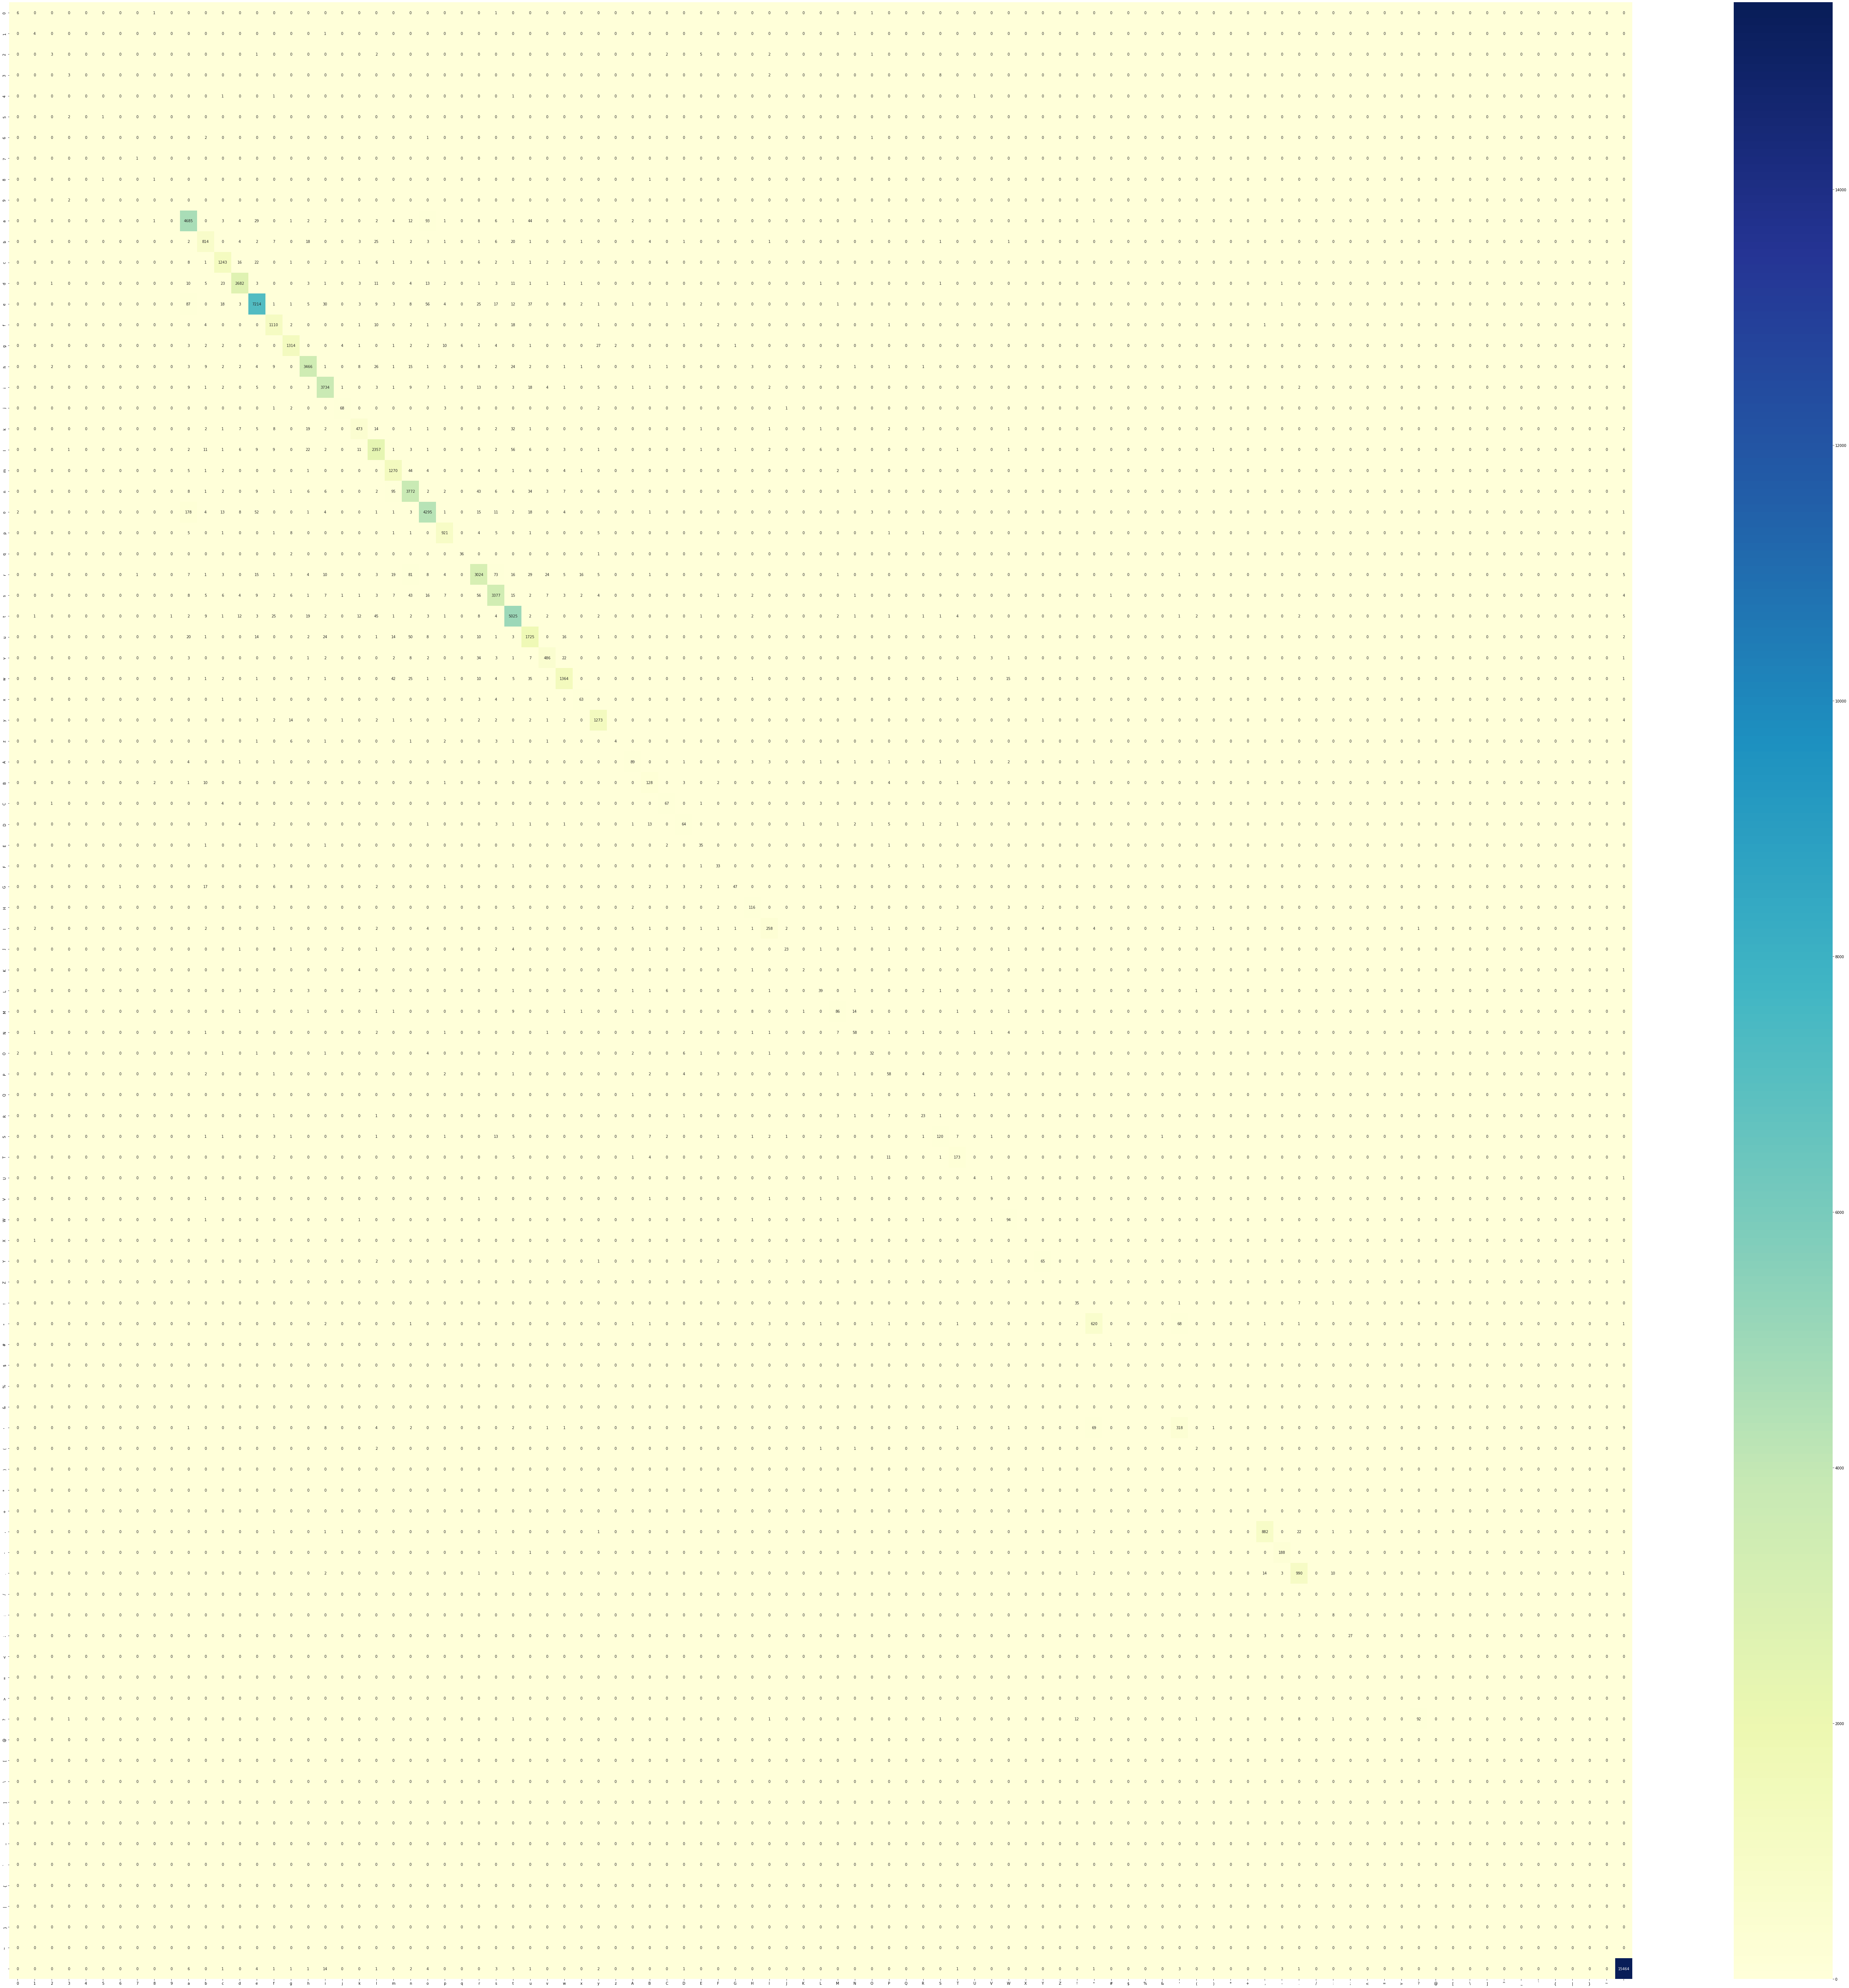

In [12]:
new=array
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
'''
plt.figure(figsize = (100,100))
#new=new.pivot(string.printable[10:62])
df_cm = pd.DataFrame(new, index = [i for i in string.printable[0:95]],
                  columns = [i for i in string.printable[0:95]])
ax = sn.heatmap(new, annot=True, fmt="d",cmap="YlGnBu",robust=True)
'''



import pandas as pd

df_cm = pd.DataFrame(array, index = [i for i in string.printable[0:95]],
                  columns = [i for i in string.printable[0:95]])
plt.figure(figsize = (100,100))
sn.heatmap(df_cm, annot=True,fmt="d",cmap="YlGnBu")

In [13]:
ins

{'0': 0,
 '1': 0,
 '2': 1,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 'a': 27,
 'b': 6,
 'c': 17,
 'd': 5,
 'e': 55,
 'f': 11,
 'g': 9,
 'h': 18,
 'i': 46,
 'j': 0,
 'k': 1,
 'l': 49,
 'm': 10,
 'n': 38,
 'o': 31,
 'p': 1,
 'q': 0,
 'r': 81,
 's': 51,
 't': 57,
 'u': 25,
 'v': 5,
 'w': 8,
 'x': 2,
 'y': 7,
 'z': 0,
 'A': 2,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 1,
 'I': 1,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 2,
 'N': 0,
 'O': 2,
 'P': 0,
 'Q': 0,
 'R': 1,
 'S': 0,
 'T': 0,
 'U': 0,
 'V': 1,
 'W': 1,
 'X': 0,
 'Y': 0,
 'Z': 0,
 '!': 4,
 '"': 14,
 '#': 1,
 '$': 0,
 '%': 0,
 '&': 1,
 "'": 8,
 '(': 1,
 ')': 2,
 '*': 0,
 '+': 0,
 ',': 14,
 '-': 6,
 '.': 17,
 '/': 0,
 ':': 1,
 ';': 1,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 0,
 '@': 0,
 '[': 0,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 143}

In [14]:
sub

{'0': 3,
 '1': 2,
 '2': 13,
 '3': 10,
 '4': 4,
 '5': 2,
 '6': 4,
 '7': 0,
 '8': 2,
 '9': 2,
 'a': 223,
 'b': 105,
 'c': 90,
 'd': 104,
 'e': 341,
 'f': 49,
 'g': 71,
 'h': 135,
 'i': 95,
 'j': 9,
 'k': 106,
 'l': 171,
 'm': 75,
 'n': 241,
 'o': 323,
 'p': 34,
 'q': 3,
 'r': 336,
 's': 233,
 't': 180,
 'u': 168,
 'v': 90,
 'w': 159,
 'x': 13,
 'y': 45,
 'z': 16,
 'A': 30,
 'B': 24,
 'C': 9,
 'D': 44,
 'E': 6,
 'F': 14,
 'G': 50,
 'H': 31,
 'I': 47,
 'J': 29,
 'K': 6,
 'L': 37,
 'M': 41,
 'N': 26,
 'O': 22,
 'P': 23,
 'Q': 3,
 'R': 15,
 'S': 52,
 'T': 27,
 'U': 5,
 'V': 5,
 'W': 15,
 'X': 1,
 'Y': 13,
 'Z': 0,
 '!': 15,
 '"': 85,
 '#': 0,
 '$': 0,
 '%': 0,
 '&': 0,
 "'": 100,
 '(': 4,
 ')': 1,
 '*': 0,
 '+': 0,
 ',': 36,
 '-': 6,
 '.': 35,
 '/': 0,
 ':': 3,
 ';': 3,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 29,
 '@': 0,
 '[': 0,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 56}

In [15]:
delete

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 'a': 30,
 'b': 8,
 'c': 23,
 'd': 14,
 'e': 108,
 'f': 27,
 'g': 13,
 'h': 26,
 'i': 31,
 'j': 1,
 'k': 11,
 'l': 71,
 'm': 6,
 'n': 46,
 'o': 47,
 'p': 9,
 'q': 1,
 'r': 123,
 's': 72,
 't': 47,
 'u': 21,
 'v': 14,
 'w': 5,
 'x': 3,
 'y': 8,
 'z': 0,
 'A': 1,
 'B': 2,
 'C': 0,
 'D': 4,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 1,
 'I': 6,
 'J': 0,
 'K': 1,
 'L': 2,
 'M': 0,
 'N': 0,
 'O': 2,
 'P': 1,
 'Q': 0,
 'R': 1,
 'S': 1,
 'T': 0,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 0,
 'Y': 0,
 'Z': 0,
 '!': 3,
 '"': 18,
 '#': 1,
 '$': 0,
 '%': 0,
 '&': 0,
 "'": 60,
 '(': 0,
 ')': 2,
 '*': 0,
 '+': 0,
 ',': 11,
 '-': 3,
 '.': 21,
 '/': 0,
 ':': 0,
 ';': 0,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 3,
 '@': 0,
 '[': 0,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 210}

In [16]:
    
    
    
    
 #evaluation metrics added
 
  
    
# Copyright (c) OpenMMLab. All rights reserved.
import re
from difflib import SequenceMatcher

from rapidfuzz import string_metric


def cal_true_positive_char(pred, gt):
  all_opt = SequenceMatcher(None, pred, gt)
  true_positive_char_num = 0
  for opt, _, _, s2, e2 in all_opt.get_opcodes():
        if opt == 'equal':
          true_positive_char_num += (e2 - s2)
        else:
          pass
  return true_positive_char_num


def count_matches(pred_texts, gt_texts):
    match_res = {
        'gt_char_num': 0,
        'pred_char_num': 0,
        'true_positive_char_num': 0,
        'gt_word_num': 0,
        'match_word_num': 0,
        'match_word_ignore_case': 0,
        'match_word_ignore_case_symbol': 0
    }
    comp = re.compile('[^A-Z^a-z^0-9^\u4e00-\u9fa5]')
    norm_ed_sum = 0.0
    for pred_text, gt_text in zip(pred_texts, gt_texts):
        if gt_text == pred_text:
            match_res['match_word_num'] += 1
        gt_text_lower = gt_text.lower()
        pred_text_lower = pred_text.lower()
        if gt_text_lower == pred_text_lower:
            match_res['match_word_ignore_case'] += 1
        gt_text_lower_ignore = comp.sub('', gt_text_lower)
        pred_text_lower_ignore = comp.sub('', pred_text_lower)
        if gt_text_lower_ignore == pred_text_lower_ignore:
            match_res['match_word_ignore_case_symbol'] += 1
        match_res['gt_word_num'] += 1

        # normalized edit distance
        edit_dist = string_metric.levenshtein(pred_text_lower_ignore,
                                              gt_text_lower_ignore)
        norm_ed = float(edit_dist) / max(1, len(gt_text_lower_ignore),
                                         len(pred_text_lower_ignore))
        norm_ed_sum += norm_ed

        # number to calculate char level recall & precision
        match_res['gt_char_num'] += len(gt_text_lower_ignore)
        match_res['pred_char_num'] += len(pred_text_lower_ignore)
        true_positive_char_num = cal_true_positive_char(
            pred_text_lower_ignore, gt_text_lower_ignore)
        match_res['true_positive_char_num'] += true_positive_char_num

    normalized_edit_distance = norm_ed_sum / max(1, len(gt_texts))
    match_res['ned'] = normalized_edit_distance

    return match_res


def eval_ocr_metric(pred_texts, gt_texts):
    """Evaluate the text recognition performance with metric: word accuracy and
    1-N.E.D. See https://rrc.cvc.uab.es/?ch=14&com=tasks for details.

    Args:
        pred_texts (list[str]): Text strings of prediction.
        gt_texts (list[str]): Text strings of ground truth.

    Returns:
        eval_res (dict[str: float]): Metric dict for text recognition, include:
            - word_acc: Accuracy in word level.
            - word_acc_ignore_case: Accuracy in word level, ignore letter case.
            - word_acc_ignore_case_symbol: Accuracy in word level, ignore
                letter case and symbol. (default metric for
                academic evaluation)
            - char_recall: Recall in character level, ignore
                letter case and symbol.
            - char_precision: Precision in character level, ignore
                letter case and symbol.
            - 1-N.E.D: 1 - normalized_edit_distance.
    """
    assert isinstance(pred_texts, list)
    assert isinstance(gt_texts, list)
    assert len(pred_texts) == len(gt_texts)

    match_res = count_matches(pred_texts, gt_texts)
    eps = 1e-8
    char_recall = 1.0 * match_res['true_positive_char_num'] / (
        eps + match_res['gt_char_num'])
    char_precision = 1.0 * match_res['true_positive_char_num'] / (
        eps + match_res['pred_char_num'])
    word_acc = 1.0 * match_res['match_word_num'] / (
        eps + match_res['gt_word_num'])
    word_acc_ignore_case = 1.0 * match_res['match_word_ignore_case'] / (
        eps + match_res['gt_word_num'])
    word_acc_ignore_case_symbol = 1.0 * match_res[
        'match_word_ignore_case_symbol'] / (
            eps + match_res['gt_word_num'])

    eval_res = {}
    eval_res['word_acc'] = word_acc
    eval_res['word_acc_ignore_case'] = word_acc_ignore_case
    eval_res['word_acc_ignore_case_symbol'] = word_acc_ignore_case_symbol
    eval_res['char_recall'] = char_recall
    eval_res['char_precision'] = char_precision
    eval_res['1-N.E.D'] = 1.0 - match_res['ned']

    for key, value in eval_res.items():
        eval_res[key] = float('{:.4f}'.format(value))
    print("predicted text:",pred_texts)
    return eval_res
    print(e_corpus)
    
    
    
evaluate1 = count_matches(p, g) 

print("\neval1=",evaluate1)



eval1= {'gt_char_num': 62286, 'pred_char_num': 62119, 'true_positive_char_num': 57696, 'gt_word_num': 1861, 'match_word_num': 310, 'match_word_ignore_case': 327, 'match_word_ignore_case_symbol': 407, 'ned': 0.08284055455351337}


In [17]:
sorted_ins = dict(sorted(ins.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_ins.items():
    print(f"'{char}': {count}")

' ': 143
'r': 81
't': 57
'e': 55
's': 51
'l': 49
'i': 46
'n': 38
'o': 31
'a': 27
'u': 25
'h': 18
'c': 17
'.': 17
'"': 14
',': 14
'f': 11
'm': 10
'g': 9
'w': 8
''': 8
'y': 7
'b': 6
'-': 6
'd': 5
'v': 5
'!': 4
'x': 2
'A': 2
'M': 2
'O': 2
')': 2
'2': 1
'k': 1
'p': 1
'H': 1
'I': 1
'R': 1
'V': 1
'W': 1
'#': 1
'&': 1
'(': 1
':': 1
';': 1
'0': 0
'1': 0
'3': 0
'4': 0
'5': 0
'6': 0
'7': 0
'8': 0
'9': 0
'j': 0
'q': 0
'z': 0
'B': 0
'C': 0
'D': 0
'E': 0
'F': 0
'G': 0
'J': 0
'K': 0
'L': 0
'N': 0
'P': 0
'Q': 0
'S': 0
'T': 0
'U': 0
'X': 0
'Y': 0
'Z': 0
'$': 0
'%': 0
'*': 0
'+': 0
'/': 0
'<': 0
'=': 0
'>': 0
'?': 0
'@': 0
'[': 0
'\': 0
']': 0
'^': 0
'_': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0


In [18]:
sorted_sub = dict(sorted(sub.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_sub.items():
    print(f"'{char}': {count}")

'e': 341
'r': 336
'o': 323
'n': 241
's': 233
'a': 223
't': 180
'l': 171
'u': 168
'w': 159
'h': 135
'k': 106
'b': 105
'd': 104
''': 100
'i': 95
'c': 90
'v': 90
'"': 85
'm': 75
'g': 71
' ': 56
'S': 52
'G': 50
'f': 49
'I': 47
'y': 45
'D': 44
'M': 41
'L': 37
',': 36
'.': 35
'p': 34
'H': 31
'A': 30
'J': 29
'?': 29
'T': 27
'N': 26
'B': 24
'P': 23
'O': 22
'z': 16
'R': 15
'W': 15
'!': 15
'F': 14
'2': 13
'x': 13
'Y': 13
'3': 10
'j': 9
'C': 9
'E': 6
'K': 6
'-': 6
'U': 5
'V': 5
'4': 4
'6': 4
'(': 4
'0': 3
'q': 3
'Q': 3
':': 3
';': 3
'1': 2
'5': 2
'8': 2
'9': 2
'X': 1
')': 1
'7': 0
'Z': 0
'#': 0
'$': 0
'%': 0
'&': 0
'*': 0
'+': 0
'/': 0
'<': 0
'=': 0
'>': 0
'@': 0
'[': 0
'\': 0
']': 0
'^': 0
'_': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0


In [19]:
sorted_delete = dict(sorted(delete.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_delete.items():
    print(f"'{char}': {count}")

' ': 210
'r': 123
'e': 108
's': 72
'l': 71
''': 60
'o': 47
't': 47
'n': 46
'i': 31
'a': 30
'f': 27
'h': 26
'c': 23
'u': 21
'.': 21
'"': 18
'd': 14
'v': 14
'g': 13
'k': 11
',': 11
'p': 9
'b': 8
'y': 8
'm': 6
'I': 6
'w': 5
'D': 4
'x': 3
'!': 3
'-': 3
'?': 3
'B': 2
'L': 2
'O': 2
')': 2
'j': 1
'q': 1
'A': 1
'H': 1
'K': 1
'P': 1
'R': 1
'S': 1
'#': 1
'0': 0
'1': 0
'2': 0
'3': 0
'4': 0
'5': 0
'6': 0
'7': 0
'8': 0
'9': 0
'z': 0
'C': 0
'E': 0
'F': 0
'G': 0
'J': 0
'M': 0
'N': 0
'Q': 0
'T': 0
'U': 0
'V': 0
'W': 0
'X': 0
'Y': 0
'Z': 0
'$': 0
'%': 0
'&': 0
'(': 0
'*': 0
'+': 0
'/': 0
':': 0
';': 0
'<': 0
'=': 0
'>': 0
'@': 0
'[': 0
'\': 0
']': 0
'^': 0
'_': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0


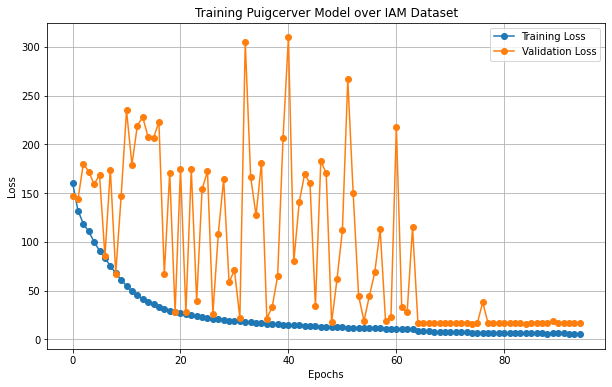

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the text file
data = pd.read_csv('/home/project/Desktop/shashank/English HTR/output/iam/puigcerver/2023-09-30 00:36:41.058527/epochs.log', delimiter=';')

# Extract the loss and val_loss values
loss = data['loss']
val_loss = data['val_loss']
epochs = data['epoch']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Customize the plot
plt.title('Training Puigcerver Model over IAM Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
